### **<ins>Code to prepare visualization tools and analysis methods to correlate the primary question with the appropriate hypothesis method:**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("Students' Academic Performance Dataset.csv")

data.head(10)


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


### **Conversion of Categorical Features and Summary Statistics**

This code snippet demonstrates the conversion of the categorical feature 'Class' into numerical values for analysis, followed by the computation of summary statistics for LMS-related features and academic performance. The summary statistics provide insights into the distribution, central tendency, and variability of the engagement metrics ('raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion') and the academic performance ('Class') of the students in the dataset (GeeksforGeeks, 2023).

In [3]:
# Stack overflow. 2015. Convert categorical data in pandas dataframe [Source Code]. 14 August 2015.
# https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe (4 November 2024)

# Convert categorical features to numerical (e.g., Class to numerical values: L -> 1, M -> 2, H -> 3)
data['Class'] = data['Class'].map({'L': 1, 'M': 2, 'H': 3})

# 1. Summary statistics of LMS-related features and academic performance (Class)
lms_features = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
print(data[lms_features + ['Class']].describe())

       raisedhands  VisITedResources  AnnouncementsView  Discussion  \
count   480.000000        480.000000         480.000000  480.000000   
mean     46.775000         54.797917          37.918750   43.283333   
std      30.779223         33.080007          26.611244   27.637735   
min       0.000000          0.000000           0.000000    1.000000   
25%      15.750000         20.000000          14.000000   20.000000   
50%      50.000000         65.000000          33.000000   39.000000   
75%      75.000000         84.000000          58.000000   70.000000   
max     100.000000         99.000000          98.000000   99.000000   

            Class  
count  480.000000  
mean     2.031250  
std      0.748738  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      3.000000  


### **Visualization of LMS Engagement Metrics vs. Academic Performance**

This code snippet generates box plots to visually compare LMS engagement metrics with academic performance (represented by the 'Class' variable). Each subplot illustrates the distribution of a specific LMS feature ('raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion') across different performance categories (Low, Medium, High). The visualizations help identify patterns, outliers, and the relationship between LMS engagement and academic success, providing a clearer understanding of how different levels of engagement relate to student performance outcomes (Chhikara, 2021).

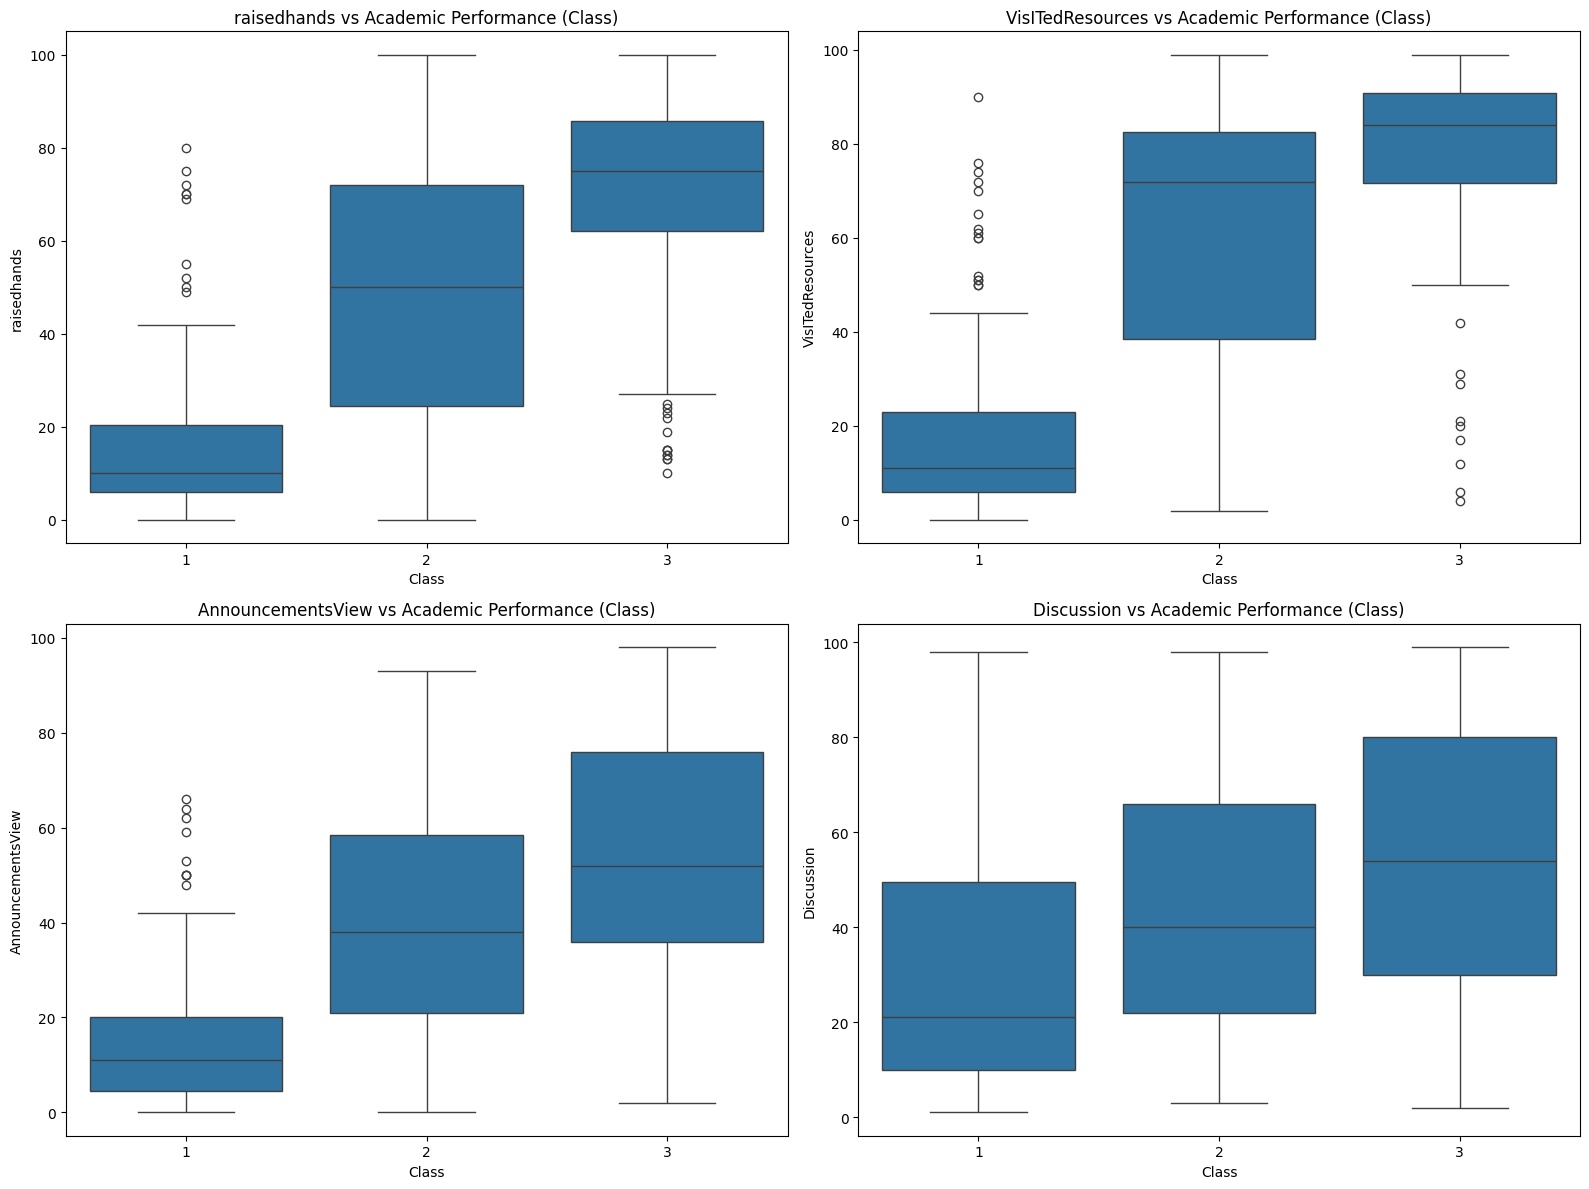

In [ ]:
# O'Reilly. Chapter 4. Visualization with Matplotlib [Source Code].
# https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html (4 November 2024)

# 2. Visualization of LMS engagement metrics vs academic performance
plt.figure(figsize=(16, 12))
for i, feature in enumerate(lms_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Class', y=feature, data=data)
    plt.title(f'{feature} vs Academic Performance (Class)')
plt.tight_layout()
plt.show()

### **Correlation Analysis of LMS Features and Academic Performance**

This code snippet computes the correlation matrix for the LMS engagement metrics and academic performance (Class). The correlation matrix quantifies the strength and direction of the relationships between the different LMS features and the academic performance categories. By displaying these correlations, this analysis helps to identify which LMS features have the strongest associations with student performance, thus informing educators and researchers about the potential impact of specific engagement activities on academic outcomes (Sololearn, N.D.).

In [ ]:
# Stack Overflow. 2015. Plot correlation matrix using pandas [Source Code]. 4 March 2015.
# https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas (4 November 2024)

# 3. Correlation analysis
correlation_matrix = data[lms_features + ['Class']].corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                    raisedhands  VisITedResources  AnnouncementsView  \
raisedhands           1.000000          0.691572           0.643918   
VisITedResources      0.691572          1.000000           0.594500   
AnnouncementsView     0.643918          0.594500           1.000000   
Discussion            0.339386          0.243292           0.417290   
Class                 0.646298          0.677094           0.527370   

                   Discussion     Class  
raisedhands          0.339386  0.646298  
VisITedResources     0.243292  0.677094  
AnnouncementsView    0.417290  0.527370  
Discussion           1.000000  0.308183  
Class                0.308183  1.000000  


### **Descriptive Statistics of the Dataset**
This code snippet generates and displays the descriptive statistics for the entire dataset, providing key summary measures such as the count, mean, standard deviation, minimum, maximum, and quartiles for each numerical feature. Descriptive statistics offer a foundational understanding of the data distribution and variability, allowing researchers to assess the general characteristics of the dataset and identify potential patterns or anomalies in the LMS engagement metrics and academic performance variables (Kent State University, N.D.).

In [4]:
# Hannes Datta. 2021. Data exploration in R (dPrep) [Source Code]. 10 September 2023.
# https://dprep.hannesdatta.com/docs/modules/week2/tutorial/intro-to-r(4 November 2024)

# Descriptive statistics for the dataset
descriptive_stats = data.describe()
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
        raisedhands  VisITedResources  AnnouncementsView  Discussion  \
count   480.000000        480.000000         480.000000  480.000000   
mean     46.775000         54.797917          37.918750   43.283333   
std      30.779223         33.080007          26.611244   27.637735   
min       0.000000          0.000000           0.000000    1.000000   
25%      15.750000         20.000000          14.000000   20.000000   
50%      50.000000         65.000000          33.000000   39.000000   
75%      75.000000         84.000000          58.000000   70.000000   
max     100.000000         99.000000          98.000000   99.000000   

            Class  
count  480.000000  
mean     2.031250  
std      0.748738  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      3.000000  


### **Visualization of Correlation Matrix**
This code creates a heatmap to visualize the correlation matrix between LMS engagement metrics (such as raised hands, visited resources, announcements viewed, and discussions) and academic performance. By displaying correlation values in a color-coded format, this heatmap helps to quickly identify the strength and direction of relationships between each LMS feature and the academic performance variable. Stronger correlations appear in darker colors, allowing researchers to pinpoint which LMS features might have a more pronounced impact on student performance. This visualization aids in interpreting how LMS usage influences academic outcomes (GeeksforGeeks, 2024).

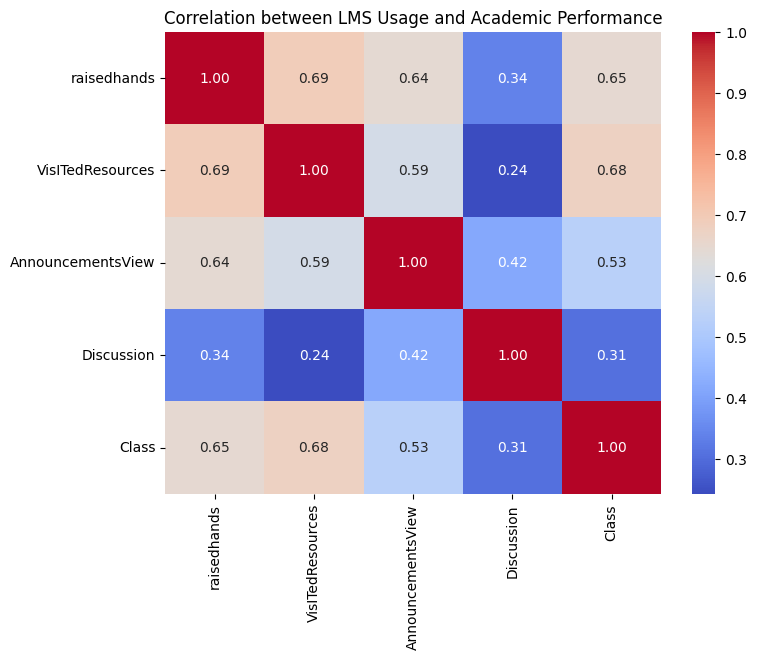

In [ ]:
# QuantHub. 2015. How to Read a Correlation Heatmap? [Source Code].
# https://www.quanthub.com/how-to-read-a-correlation-heatmap/ (4 November 2024)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between LMS Usage and Academic Performance')
plt.show()


### **Installing Required Library for Factor Analysis**

This code installs the factor_analyzer library, which provides tools to perform factor analysis in Python. Factor analysis is a statistical method often used in research to identify underlying relationships between measured variables. By grouping related variables together, factor analysis can reveal latent structures within data, which is particularly useful in understanding patterns among LMS engagement metrics. This technique can help identify common factors (e.g., "engagement" or "resource utilization") that impact academic performance (FactorAnalyzer, N.D).

In [6]:
# PyPi. factor-analyzer 0.5.1 [Source Code].
# https://pypi.org/project/factor-analyzer/(4 November 2024)

!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42566 sha256=8471fcc22f19013d8ac4a4da05b5b1414e52afbabffc03828be9a1ff7e4228f7
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


### **Loading the Student Academic Performance Dataset for Factor Analysis**

In this code, we load the "Students' Academic Performance Dataset" using the pandas library. This dataset is the foundation for the analysis, containing LMS engagement metrics and academic performance indicators, which will allow us to explore relationships and identify underlying factors influencing academic success. Once loaded, this data can be prepared for further statistical analysis, including factor analysis, which helps determine latent factors (e.g., engagement patterns) among LMS usage features that may correlate with academic outcomes (Declan, N.D.).

In [8]:
# Freie Universität Berlin. A simple example of Factor Analysis in Python [Source Code].
# https://www.fu-berlin.de/ (4 November 2024)

import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

# Load your dataset
data = pd.read_csv("Students' Academic Performance Dataset.csv")

### **Selecting LMS Engagement Metrics for Factor Analysis:**

In this step, we isolate the key LMS engagement metrics—raised hands, visited resources, announcements view, and discussion—from the dataset. These variables are chosen specifically because they represent student interactions within the LMS platform. By focusing on these metrics, we aim to uncover patterns or latent factors that contribute to students' academic engagement and performance. This selection will allow the factor analysis to identify underlying relationships that might not be immediately apparent in individual features (Declan, N.D.).

In [9]:
# Freie Universität Berlin. A simple example of Factor Analysis in Python [Source Code].
# https://www.fu-berlin.de/ (4 November 2024)

# Select the relevant LMS engagement metrics for factor analysis
lms_metrics = data[['raisedhands',	'VisITedResources',	'AnnouncementsView',	'Discussion']]

### **Performing Factor Analysis on LMS Engagement Metrics**

This code performs a factor analysis on the selected LMS engagement metrics to uncover latent variables that might explain the relationships among these metrics.

1. **Missing Value Check and Handling:** The code first checks for any missing values in the LMS metrics data. If found, rows with missing values are dropped to ensure a complete dataset for analysis.

2. **Factor Analysis Setup:** The FactorAnalyzer is initialized to extract three factors with a varimax rotation, which simplifies factor interpretation by maximizing the variance of squared loadings.

3. **Eigenvalues Plot:** To determine the optimal number of factors, the code calculates eigenvalues for each potential factor. By plotting these values, we can use the Kaiser Criterion (where eigenvalues > 1) to decide the number of factors to retain.

4. **Factor Loadings Extraction:** Finally, the code refits the factor analysis with the selected number of factors to obtain the factor loadings. The factor loadings indicate the correlation of each LMS metric with each factor, helping identify which metrics cluster together under shared underlying constructs.

5. **Visualization of Loadings:** The factor loadings are organized in a DataFrame for clear presentation, showing the strength of each LMS metric's association with each identified factor.

This analysis helps reveal underlying dimensions of LMS usage, such as engagement intensity or resource utilization, contributing to a deeper understanding of how these metrics might collectively impact academic performance.

raisedhands          0
VisITedResources     0
AnnouncementsView    0
Discussion           0
dtype: int64


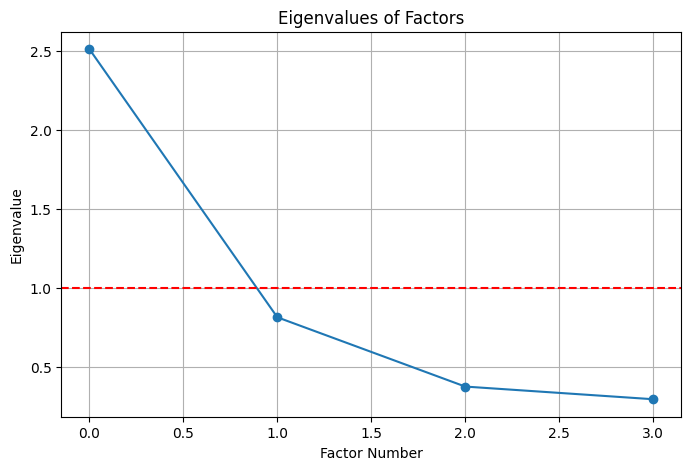

Factor Loadings:
 [[ 0.77224511  0.39681884 -0.10641431]
 [ 0.79986001  0.21709003  0.11522727]
 [ 0.54858245  0.60953635  0.20295897]
 [ 0.15733526  0.54636671 -0.01011007]]
Factor Loadings DataFrame:
                    Factor 1  Factor 2  Factor 3
raisedhands        0.772245  0.396819 -0.106414
VisITedResources   0.799860  0.217090  0.115227
AnnouncementsView  0.548582  0.609536  0.202959
Discussion         0.157335  0.546367 -0.010110


In [10]:
# Freie Universität Berlin. A simple example of Factor Analysis in Python [Source Code].
# https://www.fu-berlin.de/ (4 November 2024)

# Check for missing values
print(lms_metrics.isnull().sum())

# If there are missing values, you might want to drop or fill them
lms_metrics = lms_metrics.dropna()

# Conduct the factor analysis
fa = FactorAnalyzer(n_factors=3, rotation='varimax')  # Adjust n_factors based on your needs
fa.fit(lms_metrics)

# Get eigenvalues to determine the number of factors to retain
eigenvalues, _ = fa.get_eigenvalues()

# Plot the eigenvalues
plt.figure(figsize=(8, 5))
plt.plot(eigenvalues, marker='o')
plt.title('Eigenvalues of Factors')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.grid()
plt.axhline(y=1, color='r', linestyle='--')  # Line for Kaiser Criterion
plt.show()

# Fit the factor analysis again to extract loadings
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(lms_metrics)

# Get the factor loadings
loadings = fa.loadings_
print("Factor Loadings:\n", loadings)

# Create a DataFrame for easier visualization of factor loadings
loadings_df = pd.DataFrame(loadings, index=lms_metrics.columns, columns=[f'Factor {i+1}' for i in range(loadings.shape[1])])
print("Factor Loadings DataFrame:\n", loadings_df)

### <center>**Multiple Linear Regression Analysis of LMS Engagement Metrics on Academic Performance**</center>
This code performs a multiple linear regression analysis to assess the relationship between various LMS engagement metrics and students' academic performance (Debroy, 2023).

1. **Encoding the Target Variable:** The code first checks if the academic performance indicator (Class) is non-numeric. If so, it uses LabelEncoder to convert it into a numeric format.

2. **Ensuring Numeric Data for Features:** Each LMS feature is checked for numeric type. If any feature is non-numeric, it’s converted to numeric values, with invalid entries coerced into NaN. This ensures that all features are properly formatted for regression.

3. **Handling Missing Data:** After conversions, any rows with missing values in the LMS features or target variable (Class) are dropped.

4. **Setting Up Variables for Regression:** The X matrix (independent variables) is created from the LMS features, while y (dependent variable) is set as the Class column. A constant term is added to X to include the intercept in the model.

5. **Fitting the Model:** An Ordinary Least Squares (OLS) regression model is then fit using the LMS features as predictors for academic performance.

6. **Displaying the Results:** The model.summary() function provides a detailed output, including coefficients, standard errors, and significance levels for each feature, as well as overall model fit statistics such as R-squared.

This regression analysis offers insight into how each LMS engagement metric (e.g., raisedhands, VisITedResources) potentially influences academic performance, allowing for an assessment of the predictive power of these features in the context of the study.

In [15]:
# Stojiljković, M. Linear Regression in Python, Real Python [Source Code].
# https://realpython.com/linear-regression-in-python/ (4 November 2024)

!pip install statsmodels

In [18]:
# Stojiljković, M. Linear Regression in Python, Real Python [Source Code].
# https://realpython.com/linear-regression-in-python/ (4 November 2024)

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Assuming data is already loaded
# Encode 'Class' column if it's non-numeric
if data['Class'].dtype == 'object':
    le = LabelEncoder()
    data['Class'] = le.fit_transform(data['Class'])

# Define LMS feature columns
lms_features = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

# Check for non-numeric types in the LMS features
for feature in lms_features:
    if data[feature].dtype == 'object':
        # Convert non-numeric features to numeric if necessary
        data[feature] = pd.to_numeric(data[feature], errors='coerce')

# Drop any rows with NaN values in case any conversions failed
data = data.dropna(subset=lms_features + ['Class'])

# Define X and y for regression
X = data[lms_features]
y = data['Class']

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     7.040
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           1.64e-05
Time:                        14:04:55   Log-Likelihood:                -586.67
No. Observations:                 480   AIC:                             1183.
Df Residuals:                     475   BIC:                             1204.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.4851      0.08

### **ANOVA Analysis for LMS Engagement Metrics Across Academic Performance Levels**

This code conducts an ANOVA (Analysis of Variance) test to examine whether there are statistically significant differences in LMS engagement metrics among different levels of academic performance (low, medium, high) (GeeksforGeeks, 2024).

1. **Data Grouping:** For each LMS engagement metric (e.g., raisedhands, VisITedResources, AnnouncementsView, Discussion), the data is grouped by academic performance levels (Class), assuming the categories represent low, medium, and high performers.

2. **ANOVA Test Execution:** An ANOVA test is performed for each LMS metric across the three performance groups. The f_oneway function calculates the F-statistic and p-value for each metric, showing whether there is a statistically significant difference in engagement across performance levels.

3. **Interpretation of Results:** If the p-value is below a typical significance threshold (e.g., 0.05), it suggests that there are significant differences in engagement for that LMS metric across performance groups. This helps to identify which LMS metrics may be most associated with academic performance.

This analysis is useful for determining which aspects of LMS engagement differ significantly among student performance categories, providing insights for targeted interventions or feature enhancements.

In [19]:
# O'Reilly. 2015. Chapter 4. Visualization with Matplotlib [Source Code].
# https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html (4 November 2024)

import pandas as pd
import scipy.stats as stats

# Load your data
data = pd.read_csv("Students' Academic Performance Dataset.csv")

# Assuming 'Class' is categorized as low, medium, and high performers (e.g., 0, 1, 2)
# Group by 'Class' and examine LMS engagement metrics such as attendance and contributions
lms_metrics = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

# Conduct ANOVA for each LMS metric
for metric in lms_metrics:
    groups = [data[data['Class'] == level][metric] for level in data['Class'].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"ANOVA results for {metric}: F-statistic = {f_stat:.3f}, p-value = {p_value:.3f}")

# Interpretation: A low p-value (typically < 0.05) indicates a statistically significant difference

ANOVA results for raisedhands: F-statistic = 176.389, p-value = 0.000
ANOVA results for VisITedResources: F-statistic = 230.473, p-value = 0.000
ANOVA results for AnnouncementsView: F-statistic = 98.725, p-value = 0.000
ANOVA results for Discussion: F-statistic = 25.253, p-value = 0.000


### **Linear Regression and Correlation Analysis of LMS Engagement Metrics**

This code performs a correlation test and a linear regression analysis to evaluate the relationship between LMS engagement metrics and academic performance (represented by the Class variable). Here's a breakdown of the process:

1. **Label Encoding:** The Class column is checked for categorical data. If it is non-numeric, it is transformed into numerical values using LabelEncoder. This step is essential for performing statistical analysis and regression.

2. **Correlation Testing:** For each LMS engagement feature (e.g., raisedhands, VisITedResources, AnnouncementsView, Discussion), the Pearson correlation coefficient is calculated with respect to the Class variable. This analysis helps to determine the strength and direction of the relationship between LMS usage and academic performance.

3. **Regression Analysis:** The dataset is split into training and testing subsets to ensure the model is evaluated on unseen data. A 70-30 split is used for training and testing, respectively.A linear regression model is fitted using the training data, predicting the Class variable based on the selected LMS features.Predictions are made on the test set, and the model is evaluated using Mean Squared Error (MSE) and R-squared (R²) metrics. MSE indicates the average squared difference between predicted and actual values, while R² provides insight into the proportion of variance explained by the model.

4. **Coefficients Display:** Finally, the coefficients of the regression model are printed, indicating the relationship between each LMS feature and the academic performance classification.

This analysis allows for a deeper understanding of how various LMS engagement metrics correlate with and predict academic performance, which can inform educational strategies and interventions.

In [14]:
# The BMJ. 2015. 11. Correlation and regression [Source Code].
# https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression (4 November 2024)

import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is already loaded
# Encode the 'Class' column if it's categorical
if data['Class'].dtype == 'object':  # Check if 'Class' is non-numeric
    le = LabelEncoder()
    data['Class'] = le.fit_transform(data['Class'])

# Define LMS feature columns
lms_features = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

# 4. Hypothesis Testing (correlation test)
for feature in lms_features:
    correlation, p_value = stats.pearsonr(data[feature], data['Class'])
    print(f'Correlation between {feature} and Class: {correlation:.3f} (p-value: {p_value:.3f})')

# 5. Regression analysis (Predicting Class from LMS usage)
X = data[lms_features]
y = data['Class']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}")

# Display the coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Regression Coefficients:\n", coefficients)

Correlation between raisedhands and Class: -0.231 (p-value: 0.000)
Correlation between VisITedResources and Class: -0.162 (p-value: 0.000)
Correlation between AnnouncementsView and Class: -0.144 (p-value: 0.002)
Correlation between Discussion and Class: -0.122 (p-value: 0.007)
Mean Squared Error: 0.632
R-squared: -0.018
Regression Coefficients:
                    Coefficient
raisedhands          -0.005121
VisITedResources     -0.002156
AnnouncementsView     0.001222
Discussion           -0.002516


## **References:**

Chhikara, K. 2021. Data Visualization using Matplotlib and Seaborn libraries., Medium, 11 June 2021. [Blog]. Available at: https://chhikarakunal96.medium.com/data-visualization-using-matplotlib-and-seaborn-libraries-74cf568d4f5f [Accessed 4 November 2024]

Declan, V. Create plots and manipulate data with Pandas and Matplotlib, Our Coding Club. [Blog]. Available at: https://ourcodingclub.github.io/tutorials/pandas-python-intro/ [Accessed 4 November 2024]

Debroy, S. 2023. Simple Linear Regression in Python, Medium, 29 March 2023. [Blog]. Available at: https://medium.com/@shuv.sdr/simple-linear-regression-in-python-a0069b325bf8 [Accessed 4 November 2024]

FactorAnalyzer. Welcome to the FactorAnalyzer documentation!. [Online]. Available at: https://factor-analyzer.readthedocs.io/en/latest/ [Accessed 4 November 2024]

GeeksforGeeks. 2023. How to convert categorical string data into numeric in Python?, 06 April 2023. [Online]. Available at: https://www.geeksforgeeks.org/how-to-convert-categorical-string-data-into-numeric-in-python/ [Accessed 4 November 2024]

GeeksforGeeks. 2024. How to create a seaborn correlation heatmap in Python?, 5 September 2024. [Online]. Available at: https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/ [Accessed 4 November 2024]

GeeksforGeeks. 2022. How to Perform a One-Way ANOVA in Python, 4 July 2022. [Online]. Available at: https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/ [Accessed 4 November 2024]

Kent State University. SPSS Tutorials: Descriptive Stats for Many Numeric Variables (Descriptives). [Online]. Available at: https://libguides.library.kent.edu/SPSS/Descriptives [Accessed 4 November 2024]

Sololearn. How to print the complete correlation matrix. [Online]. Available at: https://www.sololearn.com/en/Discuss/2440486/how-to-print-the-complete-correlation-matrix [Accessed 4 November 2024]